Topic: Project 1 Challenges  
Subject: Challenge Set 1  
Date: 09/29/2017  
Name: Zach Heick  

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from collections import defaultdict
pd.options.display.float_format = '{:.2f}'.format
import random
import datetime


%matplotlib inline

## Challenge 1

In [104]:
weeks = [170506, 170513, 170520, 170527]
url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'
df_list = []
for week in weeks:
    df_list.append(pd.read_csv(url.format(week)))
mta_df = pd.concat(df_list)

In [105]:
mta_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,00:00:00,REGULAR,6157740,2085315
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,04:00:00,REGULAR,6157777,2085319
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,08:00:00,REGULAR,6157810,2085353
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,12:00:00,REGULAR,6157963,2085453
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,16:00:00,REGULAR,6158212,2085529
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/29/2017,20:00:00,REGULAR,6158521,2085589
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,00:00:00,REGULAR,6158637,2085612
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,04:00:00,REGULAR,6158654,2085617
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,08:00:00,REGULAR,6158661,2085641
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2017,12:00:00,REGULAR,6158703,2085730


In [106]:
prob1_d = defaultdict(list)
for row in mta_df.itertuples():
    C_A, unit, scp, station = row[1], row[2], row[3], row[4]
    v = [row[5], row[6], row[7], row[8], row[9], row[10], row[11]]
    k = (C_A, unit, scp, station)
    prob1_d[k].append(v)

## Challenge 2

In [107]:
prob2_d = defaultdict(list)
for row in mta_df.itertuples():
    C_A, unit, scp, station = row[1], row[2], row[3], row[4]
    dt = datetime.datetime.strptime(row[7] + ' ' + row[8], '%m/%d/%Y %H:%M:%S')
    entries = row[10]
    v = [dt, entries]
    k = (C_A, unit, scp, station)
    prob2_d[k].append(v)

## Challenge 3

In [108]:
turnstile_d = {}
for key, value in prob2_d.items():
    turnstile_d[key] = sum(item[1] for item in value)

## Challenge 4

In [109]:
dates, counts = [], []
rand_k = random.choice(list(prob2_d.keys()))
for val in prob2_d[rand_k]:
    dates.append(val[0])
    counts.append(val[1])

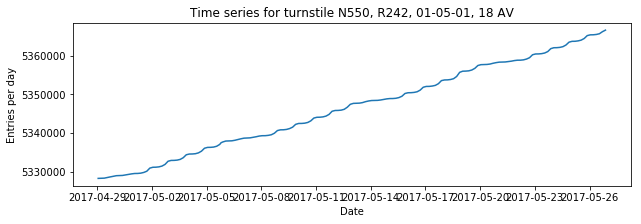

In [110]:
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.title('Time series for turnstile N550, R242, 01-05-01, 18 AV')
plt.xlabel('Date')
plt.ylabel('Entries per day');

## Challenge 5, 6, and 7

In [111]:
temp_d = defaultdict(list)
prob5_d = defaultdict(list)
for key, value in prob2_d.items():
    for pair in value:
        k = (key[0], key[1], key[3], pair[0])
        v = (pair[1])
        temp_d[k].append(v)
for key, value in temp_d.items():
    prob5_k = (key[0], key[1], key[2])
    prob5_d[prob5_k].append((key[3],sum(value)))

In [112]:
prob5_d[('A002', 'R051', '59 ST')]

[(datetime.datetime(2017, 4, 29, 0, 0), 54619081),
 (datetime.datetime(2017, 4, 29, 4, 0), 54619522),
 (datetime.datetime(2017, 4, 29, 8, 0), 54619877),
 (datetime.datetime(2017, 4, 29, 12, 0), 54621478),
 (datetime.datetime(2017, 4, 29, 16, 0), 54623862),
 (datetime.datetime(2017, 4, 29, 20, 0), 54626798),
 (datetime.datetime(2017, 4, 30, 0, 0), 54628652),
 (datetime.datetime(2017, 4, 30, 4, 0), 54629016),
 (datetime.datetime(2017, 4, 30, 8, 0), 54629179),
 (datetime.datetime(2017, 4, 30, 12, 0), 54630021),
 (datetime.datetime(2017, 4, 30, 16, 0), 54631808),
 (datetime.datetime(2017, 4, 30, 20, 0), 54633896),
 (datetime.datetime(2017, 5, 1, 0, 0), 54635144),
 (datetime.datetime(2017, 5, 1, 4, 0), 54635277),
 (datetime.datetime(2017, 5, 1, 8, 0), 54635931),
 (datetime.datetime(2017, 5, 1, 12, 0), 54638168),
 (datetime.datetime(2017, 5, 1, 16, 0), 54640814),
 (datetime.datetime(2017, 5, 1, 20, 0), 54647195),
 (datetime.datetime(2017, 5, 2, 0, 0), 54649259),
 (datetime.datetime(2017, 5, 

In [113]:
dates, counts = [], []
for val in sorted(prob5_d[('A002', 'R051', '59 ST')]):
    dates.append(val[0])
    counts.append(val[1])

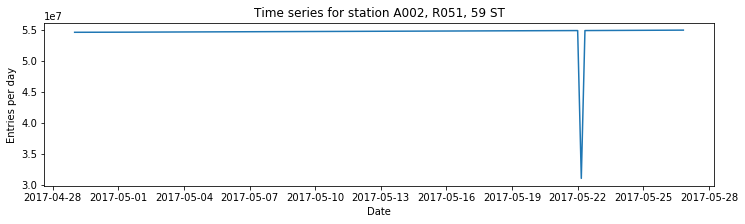

In [114]:
plt.figure(figsize=(12,3))
plt.plot(dates,counts)
plt.title('Time series for station A002, R051, 59 ST')
plt.xlabel('Date')
plt.ylabel('Entries per day');

## Challenge 8

In [115]:
temp8_d = {}
temp8_d[('A002', 'R051', '59 ST')] = prob5_d[('A002', 'R051', '59 ST')]
prob8_d = {}
prob8_d[('A002', 'R051', '59 ST')] = []

for pair in temp8_d[('A002', 'R051', '59 ST')]:
    prob8_d[('A002', 'R051', '59 ST')].append((pair[0].weekday(), pair[1]))

In [116]:
weeks_d = {}
for pair in prob8_d[('A002', 'R051', '59 ST')]:
    if pair[0] not in weeks_d:
        weeks_d[pair[0]] = pair[1]
    else:
        weeks_d[pair[0]] += pair[1]

In [117]:
dates, counts = [], []
for key, value in weeks_d.items():
    dates.append(key)
    counts.append(value)

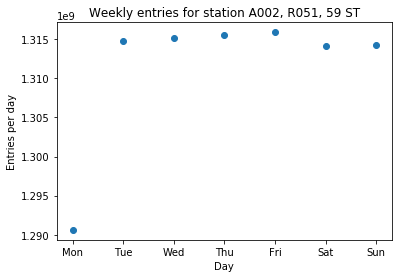

In [119]:
plt.scatter(dates, counts)
plt.title('Weekly entries for station A002, R051, 59 ST')
plt.xlabel('Day')
plt.ylabel('Entries per day')
days = ['Sat','Sun','Mon','Tue','Wed','Thu','Fri']
plt.xticks(dates, days);

## Challenge 9, 10

In [123]:
temp_d = defaultdict(list)
turnstile_d = {}
for row in mta_df.itertuples():
    C_A, unit, scp, station, linename, date = row[1], row[2], row[3], row[4], ''.join(sorted(row[5])), row[7]
    entries = row[10]
    k = (C_A, unit, scp, station, linename, date)
    temp_d[k].append(entries)

for key, value in temp_d.items():
    entry = abs(max(value) - min(value))
    turnstile_d[key] = [entry]

In [124]:
dict_df = pd.DataFrame.from_dict(turnstile_d, orient='index')
dict_df.rename(columns = {0:'Entries'}, inplace=True)

In [125]:
turnstile_df = pd.DataFrame(columns=[])
turnstile_df['C/A'] = [row[0][0] for row in dict_df.itertuples()]
turnstile_df['Unit'] = [row[0][1] for row in dict_df.itertuples()]
turnstile_df['SCP'] = [row[0][2] for row in dict_df.itertuples()]
turnstile_df['Station'] = [row[0][3] for row in dict_df.itertuples()]
turnstile_df['Linename'] = [row[0][4] for row in dict_df.itertuples()]
turnstile_df['Date'] = [row[0][5] for row in dict_df.itertuples()]
turnstile_df['Entries'] = [row[1] for row in dict_df.itertuples()]

In [126]:
pd.to_datetime(turnstile_df['Date'])
turnstile_df.groupby(['Linename', 'Station']).sum().sort_values(by='Entries',ascending=False).head(10)

busiest_turnstile_df = turnstile_df.groupby(['Linename','Station']).sum()
busiest_turnstile_df = busiest_turnstile_df.sort_values(by='Entries',ascending=False)
busiest_turnstile_df.reset_index(inplace=True)